# Logarithmische Darstellung

In der Messtechnik können unter Umständen Messwerte in ganz unterschiedlichen Größenordnungen anfallen. Für eine Darstellung im Diagramm, bei dem die Achsen typischerweise eine feste Einheit besitzen, nutzt man die logarithmischen Darstellung. Hierfür gibt es zwei Möglichkeiten:
* die Achsen können doppel- oder halb-logarithmisch eingestellt 
* die Messwerte werden in logarithmische Einheiten umgerechnet und dann linear aufgetragen

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

## Synthetische Daten generieren

Um dies zu veranschaulichen zeichnen wir Bode Plots (kommt noch später in der Vorlesung). Jetzt muss erst mal nur bekannt sein, dass es sich hierbei um 2 Datensätzen handelt, Amplitude und Phase, die jeweils über die Frequenz grafisch dargestellt werden. Solche Art von Diagrammen sind eventuell schon aus der Mechanik bekannt.

Um die Daten, die wir plotten möchten, zu modellieren, muss dafür die Library `scipy.signal` importiert werden:

In [2]:
import scipy.signal as signal

Wir erstellen 1 Datensatz für ein bestimmtes Messsystem, hier einen Tiefpass:
* `w` gibt die Frequenz in Hz an
* `mag` gibt die Amplitude in dB an
* `phase` gibt die Phase in Grad an

In [3]:
# Transfer Funktion für das Model eines Tiefpasses:
num = np.array([1])
den = np.array([1 , 1])
H = signal.TransferFunction(num , den)

# Bode-Plot Daten:
w, mag, phase = signal.bode(H)

Die Daten können wir wieder in `dataframes` abspeichern, wenn das Arbeiten mit den Objekten für euch angenehmer ist.

In [4]:
data = {"frequenz": w, "amplitude": mag, "phase": phase}
data_df = pd.DataFrame(data)
print(data_df)

     frequenz  amplitude      phase
0    0.010000  -0.000434  -0.572939
1    0.010723  -0.000499  -0.614340
2    0.011498  -0.000574  -0.658733
3    0.012328  -0.000660  -0.706333
4    0.013219  -0.000759  -0.757372
..        ...        ...        ...
95   7.564633 -17.650996 -82.469498
96   8.111308 -18.247330 -82.971773
97   8.697490 -18.844914 -83.441178
98   9.326033 -19.443588 -83.879746
99  10.000000 -20.043214 -84.289407

[100 rows x 3 columns]


## Halb-Logarithmische Darstellung

* **Subplots:** Für das Bode Diagramm benötigen wir zwei Diagramme untereinander. Dafür erzeugen wir ein Figure mit Unterdiagrammen, so genannten `subplots`. Hier benutzen wir den `subplot(2,1,1)`-Befehl. An erster Stelle steht die Anzahl der Reihen, an zweiter Stelle die Anzahl der Spalten und an dritter Stelle in der Funktion die Nummer des Diagramms. 
* **Halblogarithmische Darstellung:** Da die Daten der Amplitude bereits in der Einheit dB vorliegen, reicht uns nun eine halblogarithmische Darstellung für beide Diagramme. Nur die Frequenzachse, also die x-Achse, soll logarithmisch aufgetragen werden und wir benutzen den `plt.semilogx`-Befehl. Würde man nur die Y-Achse logarithmisch wählen, würde man den `plt.semilogy`-Befehl nutzen.
* **Gitter:** Bei logarithmischen Darstellungen bietet es sich häufig an ein Hintergrund-Gitter zu zeichnen. Dies erhalten wir mit dem Befehle `plt.grid()`. Im Beispiel unten sind noch Optionen angegeben: 
    * `lw=0.5` setzt die Linienweite auf 0.5
    * `zorder=0` setzt das Gitter in den 0. Layer (in den Hintergrund)
    * `ls='--'` setzt den Linienstil auf gestrichelt (Alternativen: `=':'` für gepunktet, `='-'` für durchgezogen, `='.-'` für abwechselnd Punkt-Strich)
    * `which='minor'` (bzw. `='major'`) wählt aus welche Gitterlinien gerade angesprochen werden (Hauptgitternetz mit Achsenbeschriftung oder Nebengitternetz)
    * `axis='both'` legt fest, ob das Gitter sowohl auf der x- als auch auf der y-Achse gezeichnet wird. (Alternativen: `axis='x'`)

Zusätzliche dazu findest du unten noch weitere vertikale (`axvline`) und horizontale (`axhline`) Linien, die gezeichnet werden. 

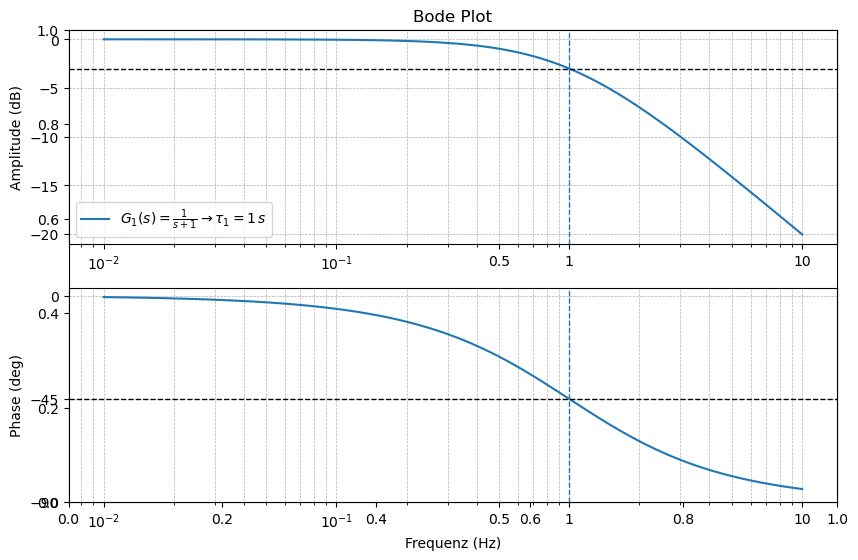

In [5]:
# Plotting
# Supplot2grid approach
fig, ax = plt.subplots(figsize=(9,6))

plt.subplot(2,1,1)
# Nutze DataFrames:
plt.semilogx(data_df["frequenz"], data_df["amplitude"], color='tab:blue', label = r'$G_1(s) = \frac{1}{s+1} \rightarrow \tau_1 = 1\, s $')
plt.axhline(y = -3, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.title("Bode Plot")
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.ylabel("Amplitude (dB)")
plt.legend()

plt.subplot(2,1,2)
# Nutze die Array-Daten statt des Dataframes (genau das gleiche...)
plt.semilogx(w, phase, color='tab:blue')
plt.axhline(y = -45, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
plt.yticks([0,-45,-90])
plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.xlabel("Frequenz (Hz)")
plt.ylabel('Phase (deg)')

fig.tight_layout()

## Doppellogarithmische Darstellung

Zur Übung rechnen wir die dB Daten in Volt um...

In [6]:
data_df["amplitude_V"] = 10**(data_df["amplitude"]/20)

... und zeichnen die Amplitude mit dem `plt.loglog`-Befehl in ein doppelogarithmisches Diagramm:

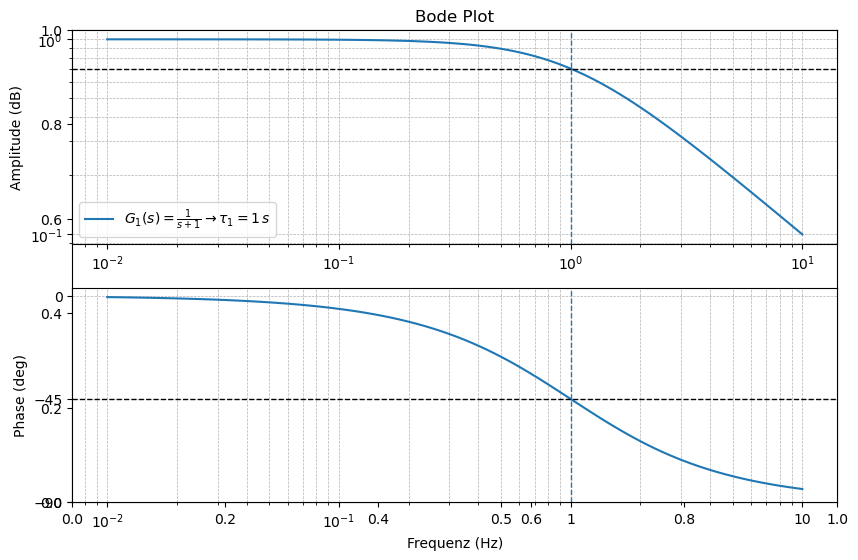

In [7]:
# Plotting
# Supplot2grid approach
fig, ax = plt.subplots(figsize=(9,6))

plt.subplot(2,1,1)
# Nutze DataFrames:
plt.loglog(data_df["frequenz"], data_df["amplitude_V"], color='tab:blue', label = r'$G_1(s) = \frac{1}{s+1} \rightarrow \tau_1 = 1\, s $')
plt.axhline(y = 0.7, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
#plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.title("Bode Plot")
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.ylabel("Amplitude (dB)")
plt.legend()

plt.subplot(2,1,2)
# Nutze die Array-Daten statt des Dataframes (genau das gleiche...)
plt.semilogx(w, phase, color='tab:blue')
plt.axhline(y = -45, color='k', ls = '--', lw = 1)
plt.axvline(x = 1, color='tab:blue', ls = '--', lw = 1)
plt.yticks([0,-45,-90])
plt.xticks([1e-2, 1e-1, 0.5, 1, 10], labels = [r'$10^{-2}$', r'$10^{-1}$', '0.5', '1', '10'])
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='minor', axis='both')
plt.grid(True, lw=0.5, zorder=0, ls = '--', which='major', axis='both')
plt.xlabel("Frequenz (Hz)")
plt.ylabel('Phase (deg)')

fig.tight_layout()